
---


# **Basic Overview of Dataset**



---

The dataset comprises 769 instances of female patients from the Pima Indian heritage, aged 21 and above, aimed at predicting diabetes probability. It includes eight variables: **Pregnancies, Glucose, Blood Pressure, Skin Thickness, Insulin, BMI, Diabetes Pedigree Function, and Age**. The goal is to provide a binary answer indicating the likelihood of diabetes based on these variables. The dataset is sourced from Kaggle and focuses on a specific demographic for targeted analysis.And the features of dataset like columns contains numerical values.




---


**LINK TO DATASET:https://www.kaggle.com/datasets/kandij/diabetes-dataset/data**


---



# **Step 1:** Importing libraries

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [65]:
data=pd.read_csv("diabetes2.csv")

# **Step 2:** Visualizing the data

In [66]:
data.shape

(768, 9)

In [67]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [68]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


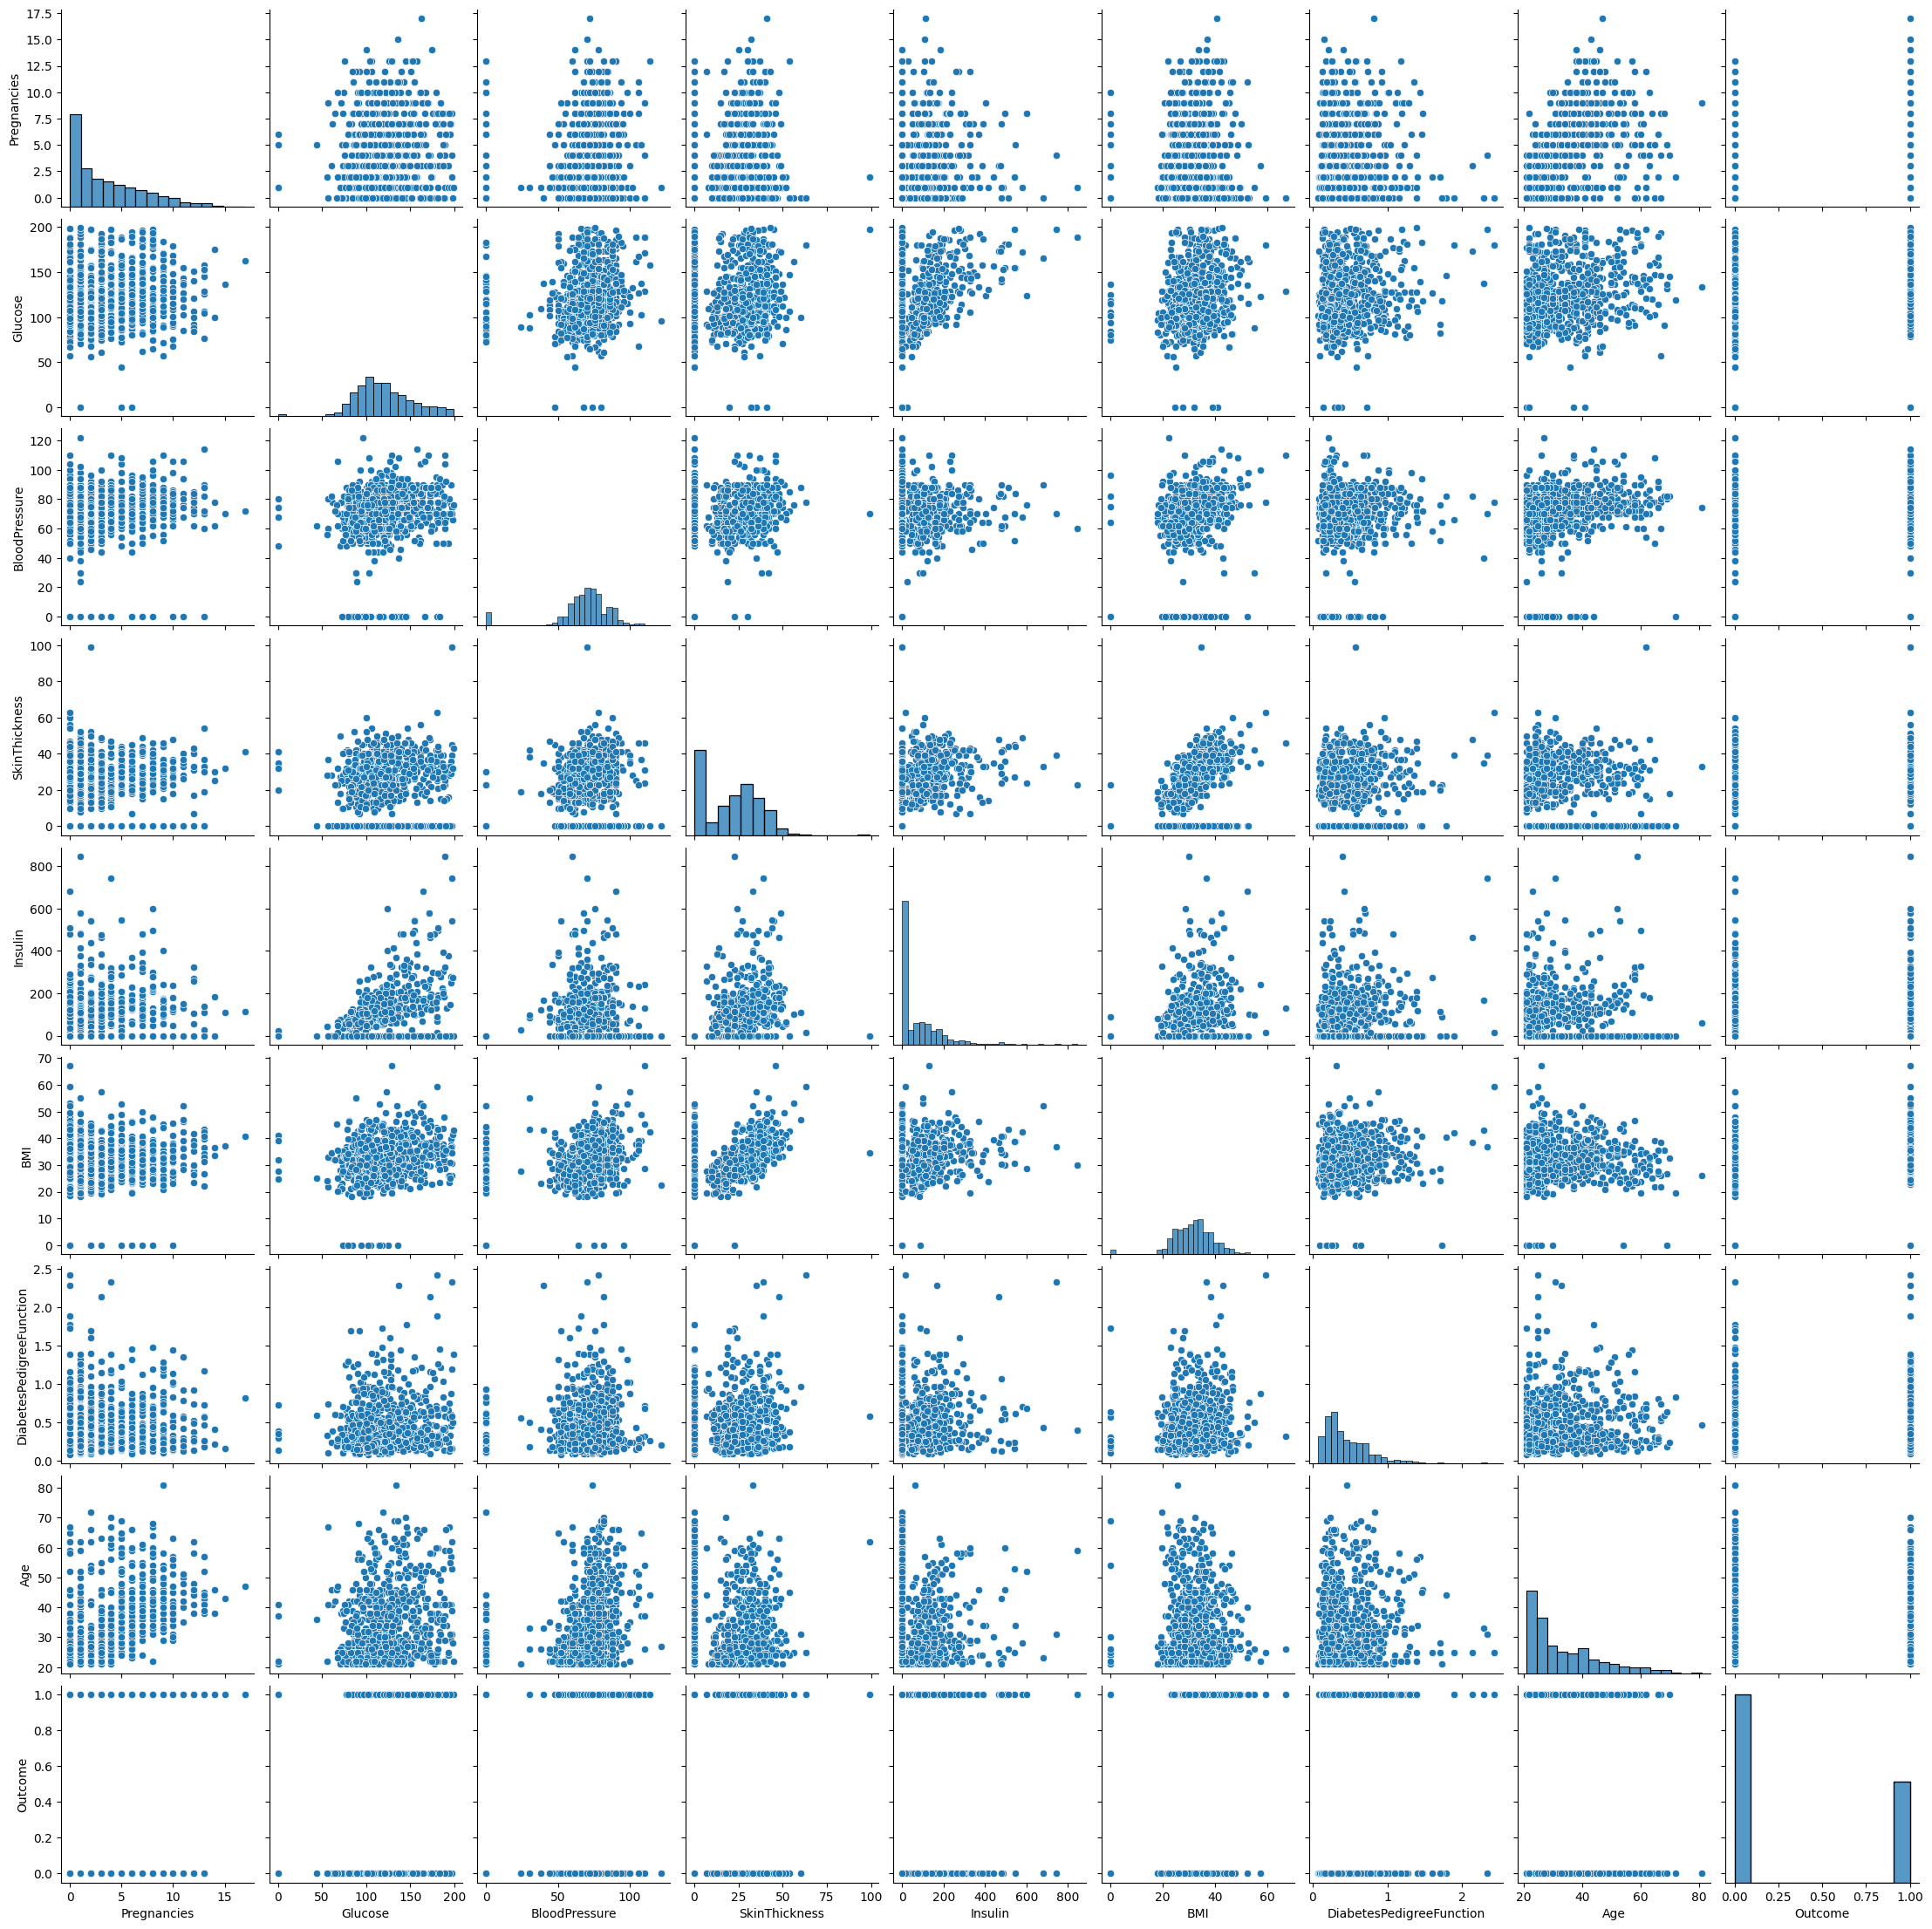

In [69]:
def plot_scatter_pairs(df):
    sns.pairplot(df)
    plt.show()
plot_scatter_pairs(data[:-1])

# **Step 3:** Preprocessing Data (Data Cleaning)

In [70]:

data['SkinThickness']=data['SkinThickness'].replace(0,data['SkinThickness'].mean())
data['Insulin']=data['Insulin'].replace(0,data['Insulin'].mean())
data['Glucose']=data['Glucose'].replace(0,data['Glucose'].mean())
data['BloodPressure']=data['BloodPressure'].replace(0,data['BloodPressure'].mean())
data['BMI']=data['BMI'].replace(0,data['BMI'].mean())
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1


In [71]:
def remove_outliers_iqr(df, columns, threshold=1.5):
    cleaned_df = df.copy()
    for col in columns:
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - threshold * iqr
        upper_bound = q3 + threshold * iqr
        cleaned_df = cleaned_df[(cleaned_df[col] >= lower_bound) & (cleaned_df[col] <= upper_bound)]
    return cleaned_df
df = data
columns = ['Pregnancies',	'Glucose',	'BloodPressure',	'SkinThickness',	'Insulin',	'BMI',	'DiabetesPedigreeFunction','Age']
cleaned_df = remove_outliers_iqr(df, columns)

print("Original DataFrame shape:", df.shape)
print("Cleaned DataFrame shape:", cleaned_df.shape)

Original DataFrame shape: (768, 9)
Cleaned DataFrame shape: (619, 9)


Visualizing again

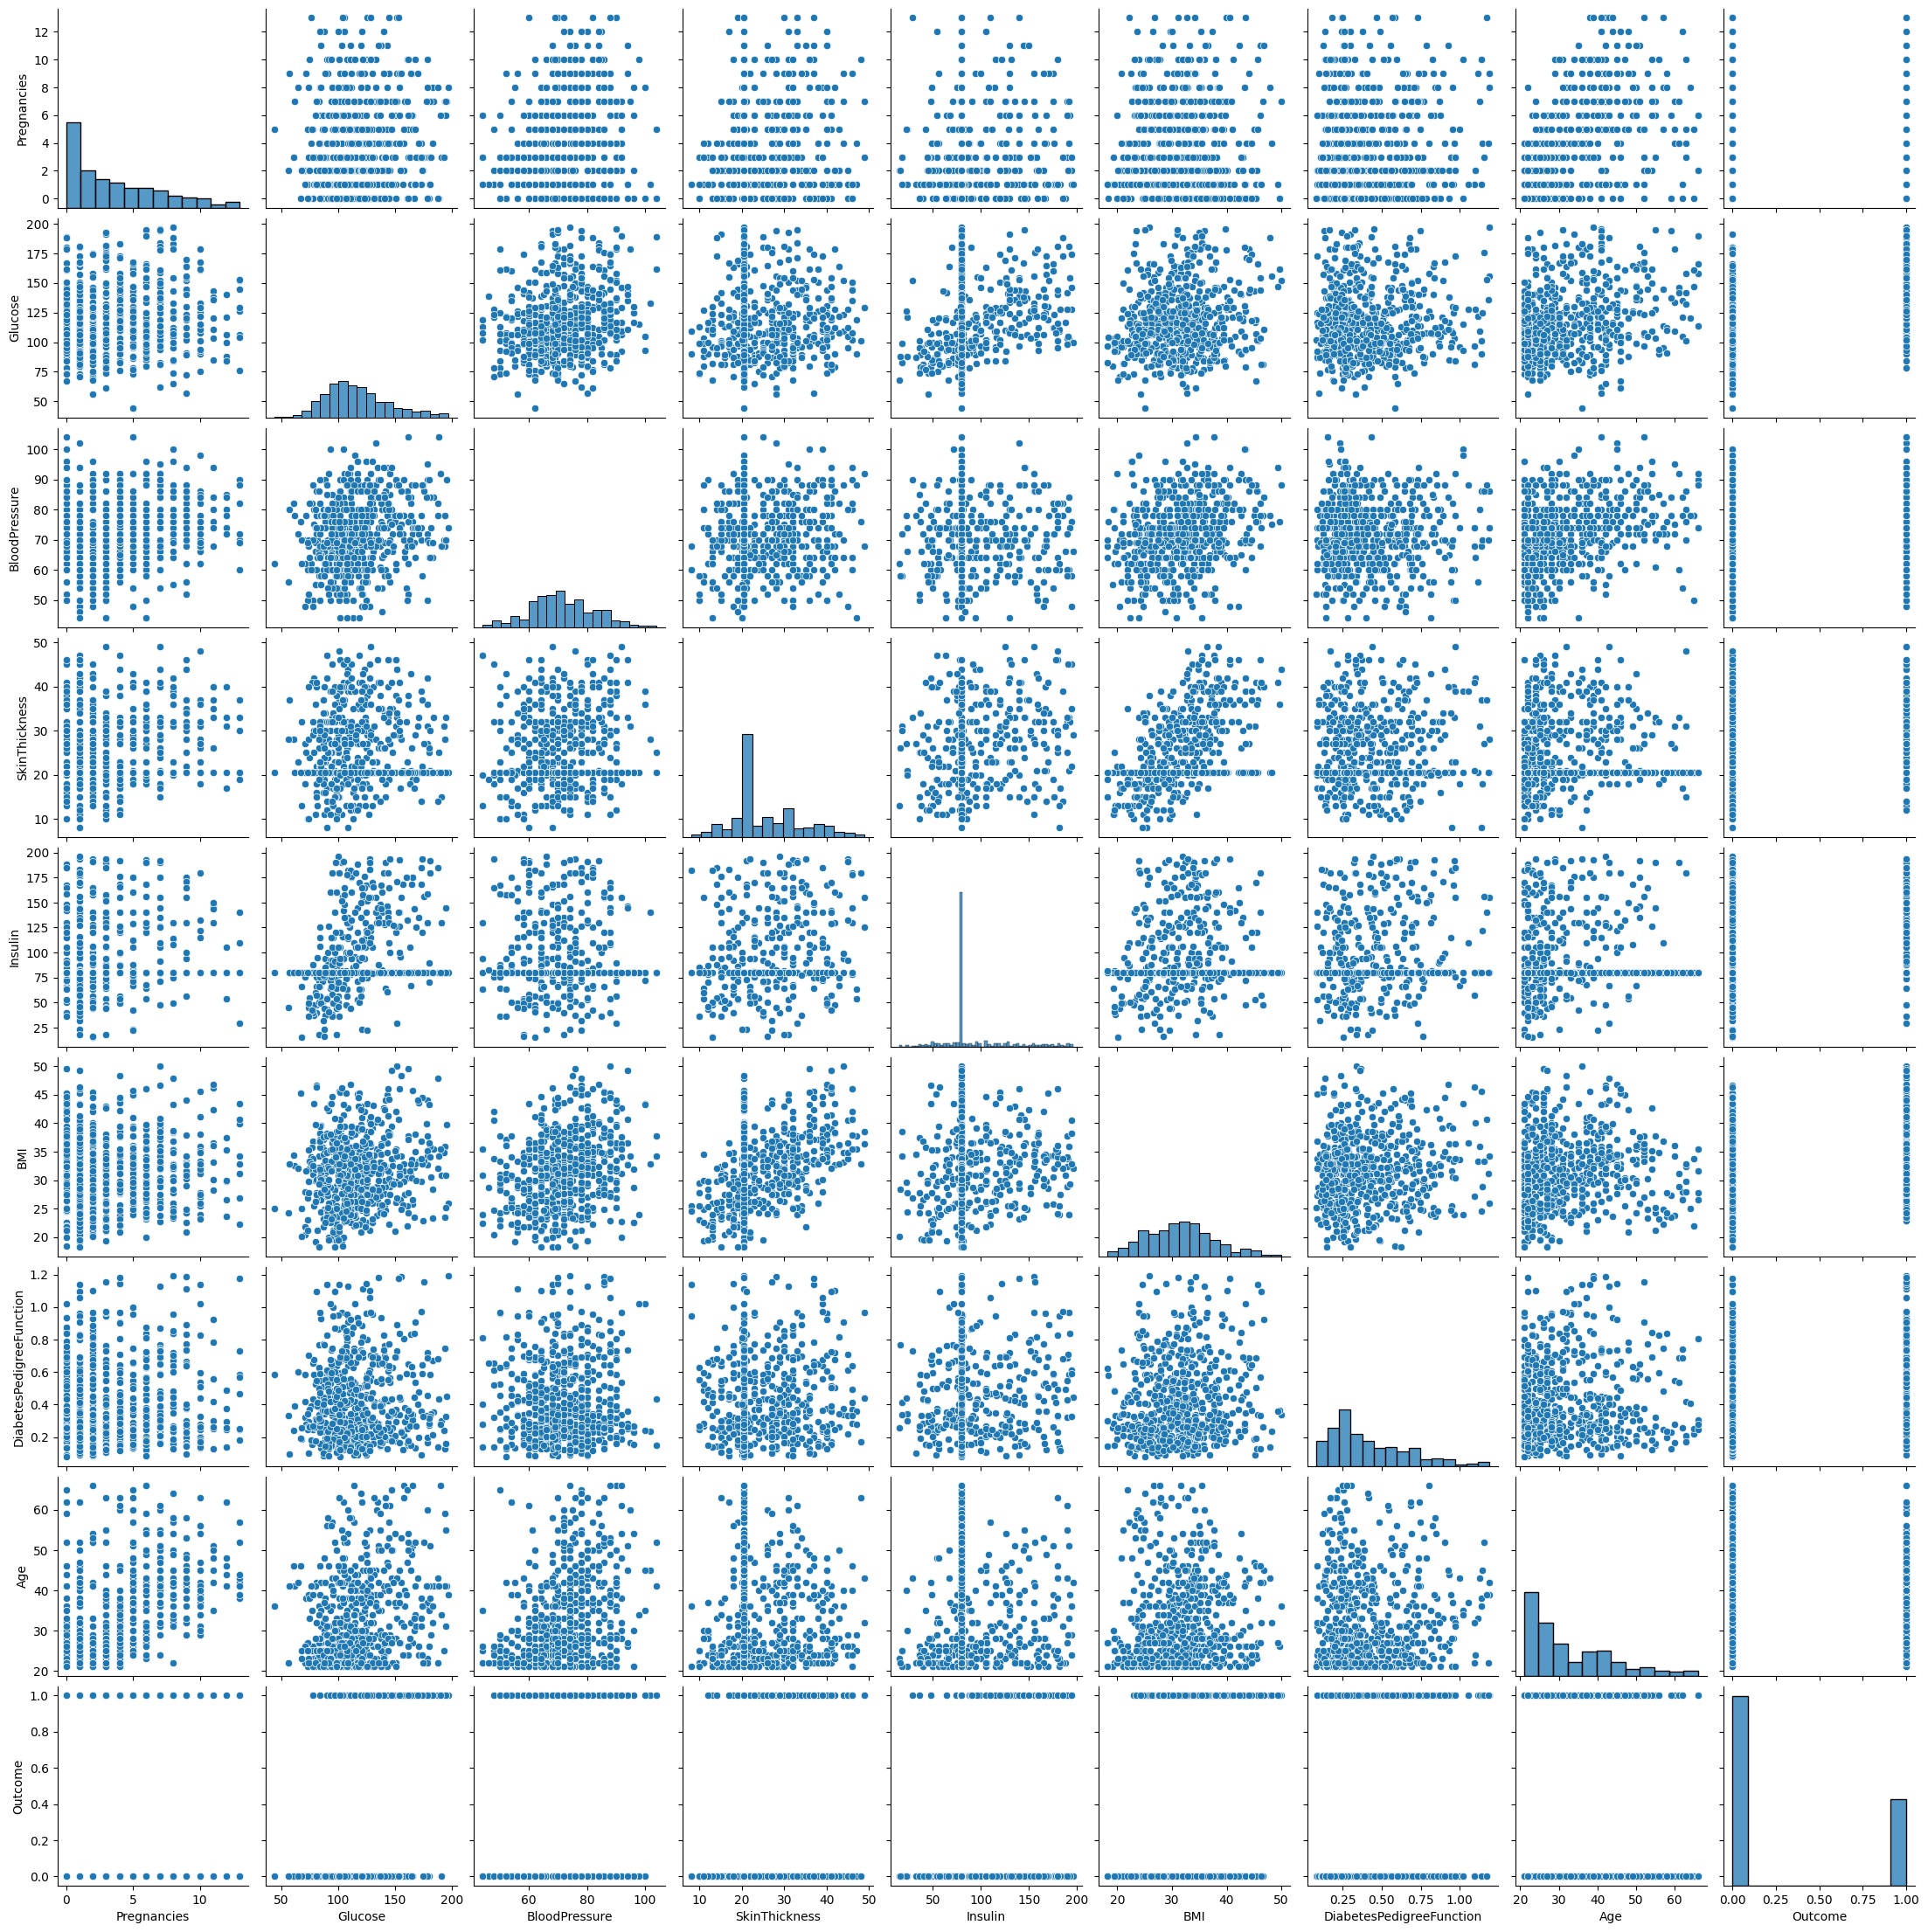

In [73]:
def plot_scatter_pairs(df):
    sns.pairplot(df)
    plt.show()
plot_scatter_pairs(cleaned_df[:-1])

## **Step 4:** Implementation of Logistic Regression function as Machine Learning Model



In [74]:
class LogisticRegression:
    def __init__(self, learning_rate=0.01, num_iterations=1000):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.weights = None
        self.bias = None

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def fit(self, X, y):
        m, n = X.shape
        self.weights = np.zeros(n)
        self.bias = 0

        for _ in range(self.num_iterations):
            # Forward propagation
            z = np.dot(X, self.weights) + self.bias
            y_pred = self.sigmoid(z)

            # Compute cost
            cost = -1/m * np.sum(y * np.log(y_pred) + (1-y) * np.log(1-y_pred))

            # Backpropagation
            dw = 1/m * np.dot(X.T, (y_pred - y))    # X.T => Transpose of X
            db = 1/m * np.sum(y_pred - y)           # dw =>gradient of the cost function with respect to the weights
                                                    # db =>gradient of the cost function with respect to the bias
            # Update parameters
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    def predict(self, X):
        z = np.dot(X, self.weights) + self.bias
        y_pred = self.sigmoid(z)
        return [1 if p >= 0.5 else 0 for p in y_pred]

# **Step 4:** Spliting data into train data and test data with 70/30 ratio

We partition the data into training and testing sets, allocating 70% of the dataset for training the model. Subsequently, the model utilizes this training data to make predictions on the remaining 30%, which serves as unseen data. This process enables us to assess the accuracy of the model's predictions, gauging its performance on previously unseen data.

In [75]:
X = cleaned_df.drop(columns=['Outcome']).values
y = cleaned_df['Outcome'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# **Step 5:** Training the Model on Train Data

In [76]:
# Scaling the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Training the data using scikit-learn's LogisticRegression with adjusted max_iter
model = LogisticRegression()  # Adjust max_iter parameter
model.fit(X_train_scaled, y_train)

# Making predictions
y_pred = model.predict(X_test_scaled)

# **Step 6:** Evaluating the Model on the Test Data

In [77]:
# Calculating MAE
mae = mean_absolute_error(y_test, y_pred)
print("MAE:",mae)

# Calculating RMSE
rmse = mean_squared_error(y_test, y_pred, squared=False)
print("RMSE:",rmse)

# Calculating R2 score
r2 = r2_score(y_test, y_pred)
print("R2:",r2)

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Calculating accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy*100,"%")

# Calculating precision
precision = precision_score(y_test, y_pred)
print("Precision:", precision*100,"%")

# Calculating recall
recall = recall_score(y_test, y_pred)
print("Recall:", recall*100,"%")

# Calculating F1 score
f1 = f1_score(y_test, y_pred)
print("F1 score:", f1*100,"%")

MAE: 0.1881720430107527
RMSE: 0.4337880162138561
R2: 0.07646474677259207
Confusion Matrix:
[[114  19]
 [ 16  37]]
Accuracy: 81.18279569892472 %
Precision: 66.07142857142857 %
Recall: 69.81132075471697 %
F1 score: 67.88990825688073 %
